# **딥 러닝 기반 이진 분류 모델**

## NVIDIA-GPU 세팅 확인

In [4]:
!nvidia-smi

Mon Jul  7 08:39:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **데이터셋 불러오기**

In [5]:
# 사용할 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/smoking.csv")

### 데이터셋 살펴보기

In [7]:
df.head(10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


In [8]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [9]:
df.shape

(55692, 27)

## **입력 및 목표 (Target) 데이터 분리**

In [10]:
input_data, target_data = df.drop(columns=["smoking"], axis=1), df["smoking"]

### 입력 변수 명칭 확인

In [11]:
input_data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar'],
      dtype='object')

### 입력 변수 데이터 타입 확인

In [12]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

### 목표 (Target) 변수 확인

In [13]:
target_data

,smoking
0,0
1,0
2,1
3,0
4,0
...,...
55687,0
55688,0
55689,0
55690,0


## **데이터셋 전처리**

### One-Hot Encoding

In [14]:
input_data_ohe = input_data.loc[:, ["gender","oral","tartar"]]

In [15]:
input_data_ohe

,gender,oral,tartar
0,F,Y,Y
1,F,Y,Y
2,M,Y,N
3,M,Y,Y
4,F,Y,N
...,...,...,...
55687,F,Y,Y
55688,F,Y,Y
55689,F,Y,N
55690,M,Y,N


In [16]:
input_data_ohe = pd.get_dummies(input_data_ohe)

In [17]:
input_data_ohe

,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
0,True,False,True,False,True
1,True,False,True,False,True
2,False,True,True,True,False
3,False,True,True,False,True
4,True,False,True,True,False
...,...,...,...,...,...
55687,True,False,True,False,True
55688,True,False,True,False,True
55689,True,False,True,True,False
55690,False,True,True,True,False


### Min-Max Normalization

In [18]:
def MinMaxNorm(df) :
  return (df-df.min())/(df.max()-df.min())

In [19]:
input_data_mmn = MinMaxNorm(input_data.drop(["gender","oral","tartar"], axis=1))

In [20]:
input_data_mmn

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.000000,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.0,0.0,0.254438,...,0.074672,0.112378,0.067240,0.493827,0.0,0.052174,0.009195,0.006179,0.026052,0.0
1,0.000018,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.0,0.0,0.284024,...,0.107972,0.061889,0.067778,0.481481,0.0,0.043478,0.012261,0.006179,0.017034,0.0
2,0.000036,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.0,0.0,0.396450,...,0.175580,0.083062,0.080689,0.672840,0.0,0.078261,0.011494,0.005149,0.021042,0.0
3,0.000054,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.0,0.0,0.171598,...,0.248234,0.066775,0.121033,0.604938,0.0,0.078261,0.009962,0.008582,0.017034,0.0
4,0.000072,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.0,0.0,0.289941,...,0.066599,0.094463,0.057020,0.469136,0.0,0.043478,0.007663,0.004463,0.021042,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0.999731,0.307692,0.666667,0.333333,0.307692,0.081633,0.081633,0.0,0.0,0.230769,...,0.091826,0.115635,0.062937,0.456790,0.0,0.043478,0.006130,0.002060,0.009018,1.0
55688,0.999820,0.384615,0.500000,0.190476,0.243590,0.112245,0.112245,0.0,0.0,0.177515,...,0.061554,0.112378,0.041958,0.561728,0.0,0.069565,0.010728,0.003776,0.013026,0.0
55689,0.999856,0.538462,0.500000,0.190476,0.224359,0.091837,0.112245,0.0,0.0,0.272189,...,0.069627,0.122150,0.033351,0.462963,0.0,0.034783,0.008429,0.003433,0.011022,0.0
55690,0.999874,0.615385,0.583333,0.285714,0.346154,0.071429,0.091837,0.0,0.0,0.366864,...,0.071645,0.071661,0.077999,0.586420,0.0,0.052174,0.010728,0.006179,0.017034,0.0


### 전처리가 적용된 데이터셋 합치기

In [21]:
input_data = pd.concat([input_data_ohe, input_data_mmn], axis=1)

In [22]:
input_data

,gender_F,gender_M,oral_Y,tartar_N,tartar_Y,ID,age,height(cm),weight(kg),waist(cm),...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,True,False,True,False,True,0.000000,0.307692,0.416667,0.285714,0.388462,...,0.074672,0.112378,0.067240,0.493827,0.0,0.052174,0.009195,0.006179,0.026052,0.0
1,True,False,True,False,True,0.000018,0.307692,0.500000,0.285714,0.384615,...,0.107972,0.061889,0.067778,0.481481,0.0,0.043478,0.012261,0.006179,0.017034,0.0
2,False,True,True,True,False,0.000036,0.538462,0.666667,0.285714,0.371795,...,0.175580,0.083062,0.080689,0.672840,0.0,0.078261,0.011494,0.005149,0.021042,0.0
3,False,True,True,False,True,0.000054,0.307692,0.583333,0.380952,0.474359,...,0.248234,0.066775,0.121033,0.604938,0.0,0.078261,0.009962,0.008582,0.017034,0.0
4,True,False,True,True,False,0.000072,0.307692,0.416667,0.285714,0.448718,...,0.066599,0.094463,0.057020,0.469136,0.0,0.043478,0.007663,0.004463,0.021042,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,True,False,True,False,True,0.999731,0.307692,0.666667,0.333333,0.307692,...,0.091826,0.115635,0.062937,0.456790,0.0,0.043478,0.006130,0.002060,0.009018,1.0
55688,True,False,True,False,True,0.999820,0.384615,0.500000,0.190476,0.243590,...,0.061554,0.112378,0.041958,0.561728,0.0,0.069565,0.010728,0.003776,0.013026,0.0
55689,True,False,True,True,False,0.999856,0.538462,0.500000,0.190476,0.224359,...,0.069627,0.122150,0.033351,0.462963,0.0,0.034783,0.008429,0.003433,0.011022,0.0
55690,False,True,True,True,False,0.999874,0.615385,0.583333,0.285714,0.346154,...,0.071645,0.071661,0.077999,0.586420,0.0,0.052174,0.010728,0.006179,0.017034,0.0


### 훈련 및 시험 데이터셋 분리

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
input_data, target_data = np.array(input_data, dtype=np.float64), np.array(target_data) # Boolean → Numerical Value (0 or 1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.1, random_state=42)

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [27]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(45109, 28) (45109,)
(5013, 28) (5013,)
(5570, 28) (5570,)


In [28]:
x_train

array([[0.        , 1.        , 1.        , ..., 0.00686577, 0.02304609,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.0030896 , 0.01302605,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.01373155, 0.08517034,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.00583591, 0.04709419,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.00823893, 0.12124248,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.01064195, 0.05410822,
        0.        ]])

## **PyTorch DataLoader Class 생성**

In [29]:
import torch
from torch.utils.data import Dataset

In [30]:
class MyDataLoader(Dataset) :
  def __init__(self, input_data:np.array, target_data:np.array) :
    # Inheritance
    super(MyDataLoader, self).__init__()

    # Initialize Variable
    self.input_data = input_data
    self.target_data = target_data

  def __getitem__(self, index) :
    input = self.input_data[index,:]
    target = self.target_data[index]

    input = torch.as_tensor(input)
    target = torch.as_tensor(target).unsqueeze(0)

    return {"input":input.float(), "target":target.float()}

  def __len__(self) :
    return len(self.input_data)

## **PyTorch 분류 모델 생성**

In [31]:
from torch import nn
import torch.nn.functional as F

In [32]:
class MyModel(nn.Module) :
  def __init__(self, input_dim:int, target_dim:int, hidden_dim:int) :
    # Inheritance
    super(MyModel, self).__init__()

    # Create MLP Layer Instance
    self.layer0 = nn.Linear(input_dim, hidden_dim)
    self.layer1 = nn.Linear(hidden_dim, hidden_dim*2)
    self.layer2 = nn.Linear(hidden_dim*2, hidden_dim)
    self.layer3 = nn.Linear(hidden_dim, target_dim)

  def forward(self, input) :
    output = F.relu(self.layer0(input))
    output = F.relu(self.layer1(output))
    output = F.relu(self.layer2(output))
    output = self.layer3(output)

    return output

## **훈련 하이퍼파라미터 생성**

In [33]:
opt = {"seed":42,
       "batch_size":128,
       "lr":1e-3,
       "epochs":50,
       "cuda":torch.cuda.is_available()}

## **딥 러닝 모델 훈련**

In [34]:
# 사용할 라이브러리 불러오기
from torch.utils.data import DataLoader
from torch import optim

from torchsummary import summary

from tqdm import tqdm

### Seed 고정

In [35]:
import random

In [36]:
def fix_seed(seed) :
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

### **훈련 과정 요약을 위한 Average Meter 인스턴스 생성**

In [37]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val*n
        self.count += n
        self.avg = self.sum / self.count

### **정확도 계산을 위한 Function 생성**

In [38]:
def compute_acc(pred, target) :
  pred = torch.where(pred>0, 1, 0)
  acc = (pred==target).sum()/pred.size(0)

  return acc

## **추상화된 딥 러닝 모델 훈련 코드 작성**

In [39]:
def train(opt, dataset, criterion) :
  fix_seed(opt["seed"])

  train_dataloader = DataLoader(MyDataLoader(dataset["x_train"], dataset["y_train"]), batch_size=opt["batch_size"], shuffle=True, drop_last=True)
  valid_dataloader = DataLoader(MyDataLoader(dataset["x_valid"], dataset["y_valid"]), batch_size=opt["batch_size"], shuffle=False, drop_last=False)

  fix_seed(opt["seed"])
  model = MyModel(x_train.shape[1], 1, 64)
  if opt["cuda"] :
    model = model.cuda()

  summary(model, (1, dataset["x_train"].shape[1]))

  optimizer = optim.Adam(model.parameters(), lr=opt["lr"])

  train_loss, valid_loss = AverageMeter(), AverageMeter()
  train_acc, valid_acc = AverageMeter(), AverageMeter()
  train_loss_list, valid_loss_list = [], []
  train_acc_list, valid_acc_list = [], []
  best_acc = 0

  for epoch in range(1, opt["epochs"]+1) :
    train_bar = tqdm(train_dataloader)
    train_loss.reset(), train_acc.reset()

    for data in train_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      optimizer.zero_grad()
      pred = model(input)
      loss = criterion(pred, target)
      loss.backward()
      optimizer.step()

      train_loss.update(loss.item(), opt["batch_size"])
      train_acc.update(compute_acc(pred, target).item(), opt["batch_size"])
      train_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Train] < Accuracy:{train_acc.avg:.6f} | Loss:{train_loss.avg:.6f} >")

    train_loss_list.append(train_loss.avg)
    train_acc_list.append(train_acc.avg)

    valid_bar = tqdm(valid_dataloader)
    valid_loss.reset(), valid_acc.reset()

    for data in valid_bar :
      input, target = data["input"], data["target"]
      if opt["cuda"] :
        input, target = input.cuda(), target.cuda()

      model.eval()
      with torch.no_grad() :
        pred = model(input)
        loss = criterion(pred, target)

        valid_loss.update(loss.item(), opt["batch_size"])
        valid_acc.update(compute_acc(pred, target).item(), opt["batch_size"])
        valid_bar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Valid] < Accuracy:{valid_acc.avg:.6f} | Loss:{train_loss.avg:.6f} >")

    valid_loss_list.append(valid_loss.avg)
    valid_acc_list.append(valid_acc.avg)

    if valid_acc.avg > best_acc :
      best_acc = valid_acc.avg
      torch.save(model.state_dict(), "best_model.pth")

    torch.save(model.state_dict(), "latest_model.pth")

  return (train_loss_list, valid_loss_list), (train_acc_list, valid_acc_list)

## **딥 러닝 모델 훈련 진행**

In [40]:
loss_list, acc_list = train(opt,
                            {"x_train":x_train, "y_train":y_train, "x_valid":x_valid, "y_valid":y_valid},
                            nn.BCEWithLogitsLoss())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]           1,856
            Linear-2               [-1, 1, 128]           8,320
            Linear-3                [-1, 1, 64]           8,256
            Linear-4                 [-1, 1, 1]              65
Total params: 18,497
Trainable params: 18,497
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.07
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


[1/50] [Train] < Accuracy:0.711870 | Loss:0.503864 >: 100%|██████████| 352/352 [00:02<00:00, 121.24it/s]
[1/50] [Valid] < Accuracy:0.726860 | Loss:0.503864 >: 100%|██████████| 40/40 [00:00<00:00, 201.56it/s]
[2/50] [Train] < Accuracy:0.739546 | Loss:0.474774 >: 100%|██████████| 352/352 [00:02<00:00, 169.21it/s]
[2/50] [Valid] < Accuracy:0.736430 | Loss:0.474774 >: 100%|██████████| 40/40 [00:00<00:00, 226.41it/s]
[3/50] [Train] < Accuracy:0.745761 | Loss:0.470123 >: 100%|██████████| 352/352 [00:02<00:00, 167.99it/s]
[3/50] [Valid] < Accuracy:0.749749 | Loss:0.470123 >: 100%|██████████| 40/40 [00:00<00:00, 213.79it/s]
[4/50] [Train] < Accuracy:0.748979 | Loss:0.467842 >: 100%|██████████| 352/352 [00:02<00:00, 168.42it/s]
[4/50] [Valid] < Accuracy:0.745219 | Loss:0.467842 >: 100%|██████████| 40/40 [00:00<00:00, 219.74it/s]
[5/50] [Train] < Accuracy:0.750799 | Loss:0.466866 >: 100%|██████████| 352/352 [00:03<00:00, 100.73it/s]
[5/50] [Valid] < Accuracy:0.746977 | Loss:0.466866 >: 100%|████

### 훈련 및 검증 손실 함수 시각화

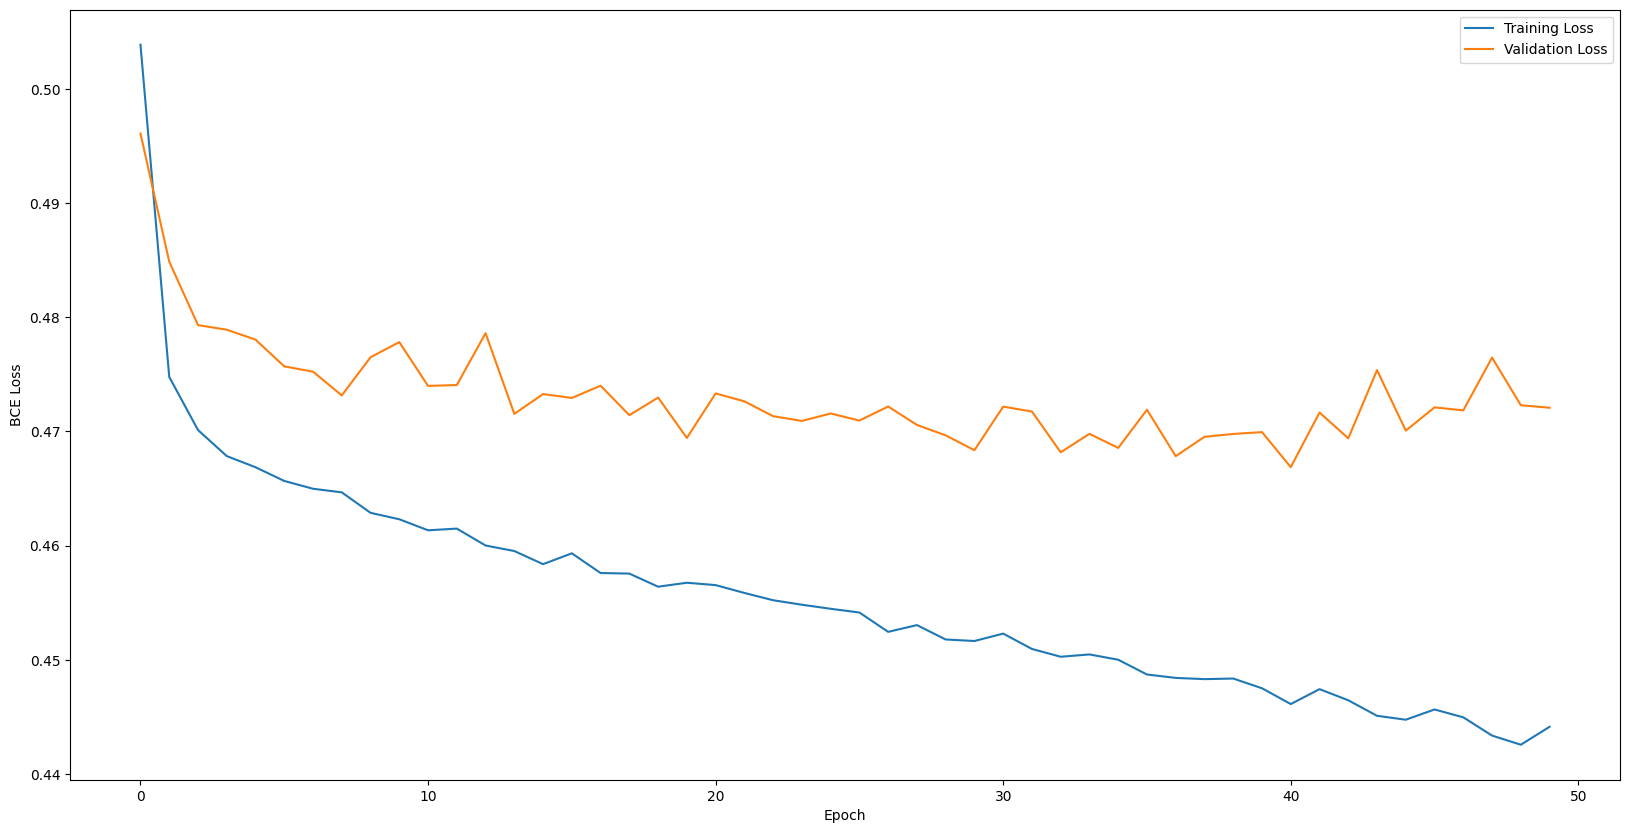

In [41]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, opt["epochs"], 1), loss_list[0], label="Training Loss")
plt.plot(np.arange(0, opt["epochs"], 1), loss_list[1], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.legend(loc="best")

plt.show()

### 훈련 및 검증 정확도 시각화

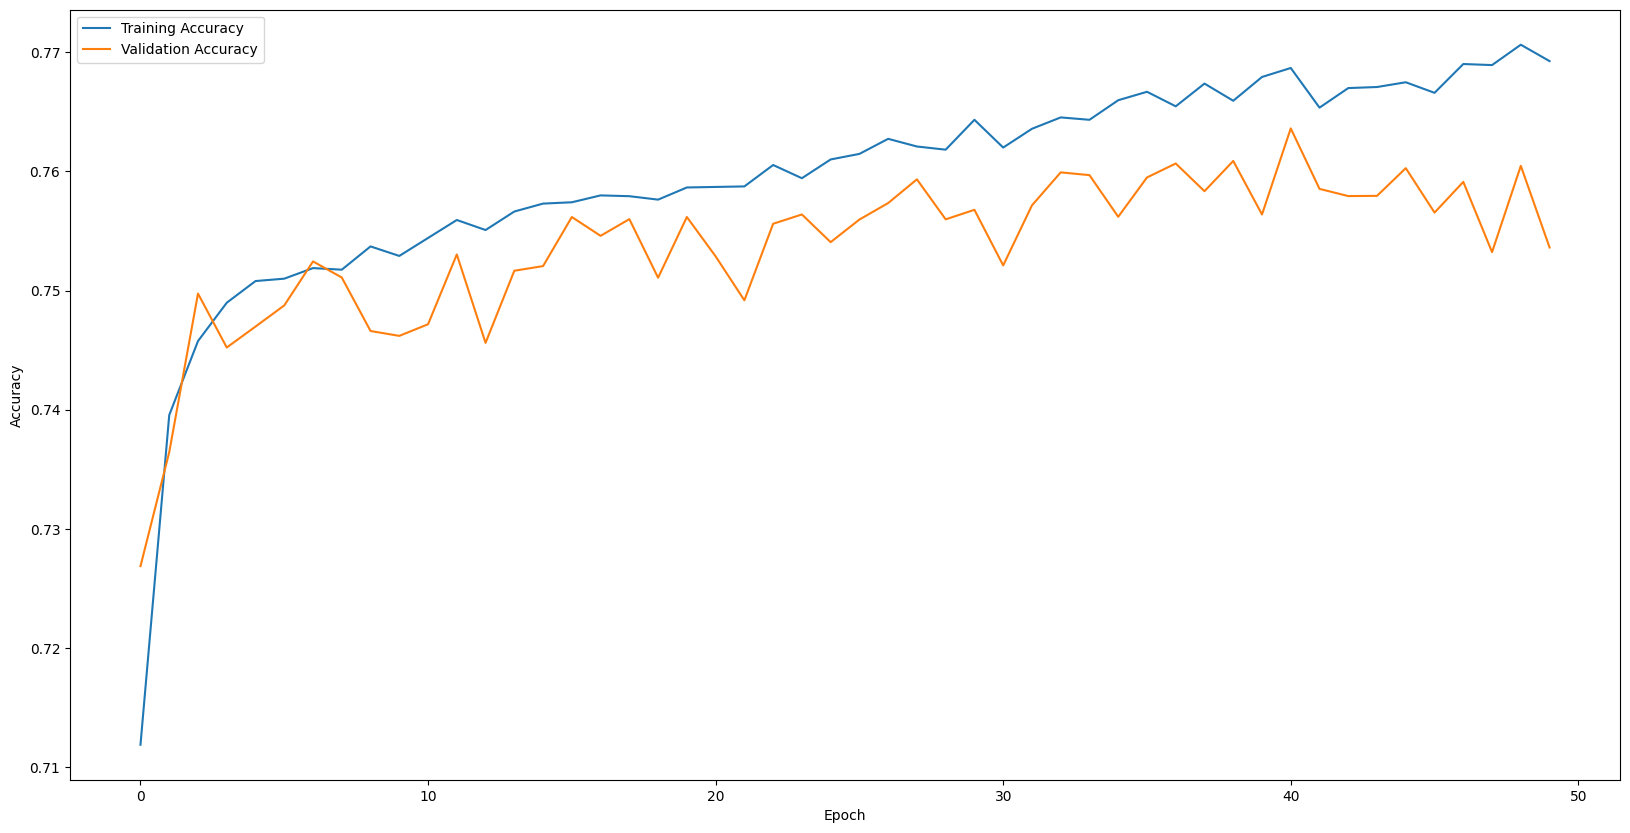

In [42]:
plt.figure(figsize=(20,10))

plt.plot(np.arange(0, opt["epochs"], 1), acc_list[0], label="Training Accuracy")
plt.plot(np.arange(0, opt["epochs"], 1), acc_list[1], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="best")

plt.show()

## **추상화된 딥 러닝 모델 추론 코드 작성**

In [43]:
def inference(opt, input_data, model_path) :
  weights = torch.load(model_path)

  model = MyModel(x_train.shape[1], 1, 64)
  model.load_state_dict(weights)
  if opt["cuda"] :
    model = model.cuda()

  input_data_tensor = torch.as_tensor(input_data).float()

  pred_list = []

  model.eval()

  with torch.no_grad() :
    with tqdm(total=input_data.shape[0]) as p_bar :
      for input_data in input_data_tensor :
        if opt["cuda"] :
          input_data = input_data.cuda()

        pred = model(input_data)
        pred_list.append(pred.detach().cpu().item())

        p_bar.update()

  return pred_list

### 시험 데이터셋 추론 진행

In [44]:
pred_list = inference(opt, x_test, "/content/best_model.pth")

100%|██████████| 5570/5570 [00:01<00:00, 3327.76it/s]


In [45]:
pred_list

[-3.8406481742858887,
 -2.9309747219085693,
 1.280547857284546,
 1.1503630876541138,
 0.054026976227760315,
 -3.970595121383667,
 0.43061158061027527,
 -4.027983665466309,
 0.1499095857143402,
 -1.19562828540802,
 0.6288666725158691,
 -3.9852023124694824,
 0.8436968326568604,
 0.89131760597229,
 -2.4562997817993164,
 -2.8294215202331543,
 0.30042168498039246,
 -3.789273262023926,
 1.7212356328964233,
 -3.5605523586273193,
 -2.971806764602661,
 -0.8504050970077515,
 -2.9754233360290527,
 -2.7949249744415283,
 -0.02797577902674675,
 -0.5999395847320557,
 -0.08593498915433884,
 1.0219752788543701,
 2.2399466037750244,
 0.3099169135093689,
 -2.9184038639068604,
 0.8960695266723633,
 0.7525901794433594,
 -4.087789535522461,
 -3.9714388847351074,
 -1.3094018697738647,
 -3.0072786808013916,
 1.0477319955825806,
 0.37963637709617615,
 0.4423384368419647,
 -0.4566362202167511,
 -0.239158034324646,
 -2.8784005641937256,
 -0.15023303031921387,
 -3.471677541732788,
 1.009433388710022,
 0.920482516

In [46]:
pred_list = np.where(np.array(pred_list)>0, 1, 0) # Threshold

In [47]:
pred_list

array([0, 0, 1, ..., 1, 0, 0])

### **시험 데이터셋 추론 결과의 정량적 분석 진행**

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
acc_score = accuracy_score(y_test, pred_list)
print(acc_score)

0.7572710951526033


In [50]:
cm = confusion_matrix(y_test, pred_list)
print(cm)

[[2821  684]
 [ 668 1397]]


In [51]:
cls_report = classification_report(y_test, pred_list)
print(cls_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3505
           1       0.67      0.68      0.67      2065

    accuracy                           0.76      5570
   macro avg       0.74      0.74      0.74      5570
weighted avg       0.76      0.76      0.76      5570

